In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df[df['math_score']==0]

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
59,female,group C,some high school,free/reduced,none,0,17,10


In [40]:
categorical_features=df.select_dtypes(include=['object','category']).columns.to_list()
numerical_features=df.select_dtypes(include=['int64','float64']).columns.to_list()
for column in categorical_features:
    print( f'{column}')
    print(df[column].unique())
    print('_____')

gender
['female' 'male']
_____
race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
_____
parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
_____
lunch
['standard' 'free/reduced']
_____
test_preparation_course
['none' 'completed']
_____


In [43]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=round(df['Total_Score']/3, 2)
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33


In [53]:
reading_full=df[df['reading_score']==100]['Average_Score'].count()
maths_full=df[df['math_score']==100]['Average_Score'].count()
writing_full=df[df['writing_score']==100]['Average_Score'].count()
print(f'Reading Full Marks: {reading_full}')
print(f'Maths Full Marks: {maths_full}')
print(f'Writing Full Marks: {writing_full}')

Reading Full Marks: 17
Maths Full Marks: 7
Writing Full Marks: 14


In [55]:
reading_less_20=df[df['reading_score']<=20]['Average_Score'].count()
maths_less_20=df[df['math_score']<=20]['Average_Score'].count()
writing_less_20=df[df['writing_score']<=20]['Average_Score'].count()
print(f'Reading Less than 20: {reading_less_20}')
print(f'Maths Less than 20: {maths_less_20}')
print(f'Writing Less than 20: {writing_less_20}')

Reading Less than 20: 1
Maths Less than 20: 4
Writing Less than 20: 3


<Axes: xlabel='Average_Score', ylabel='Count'>

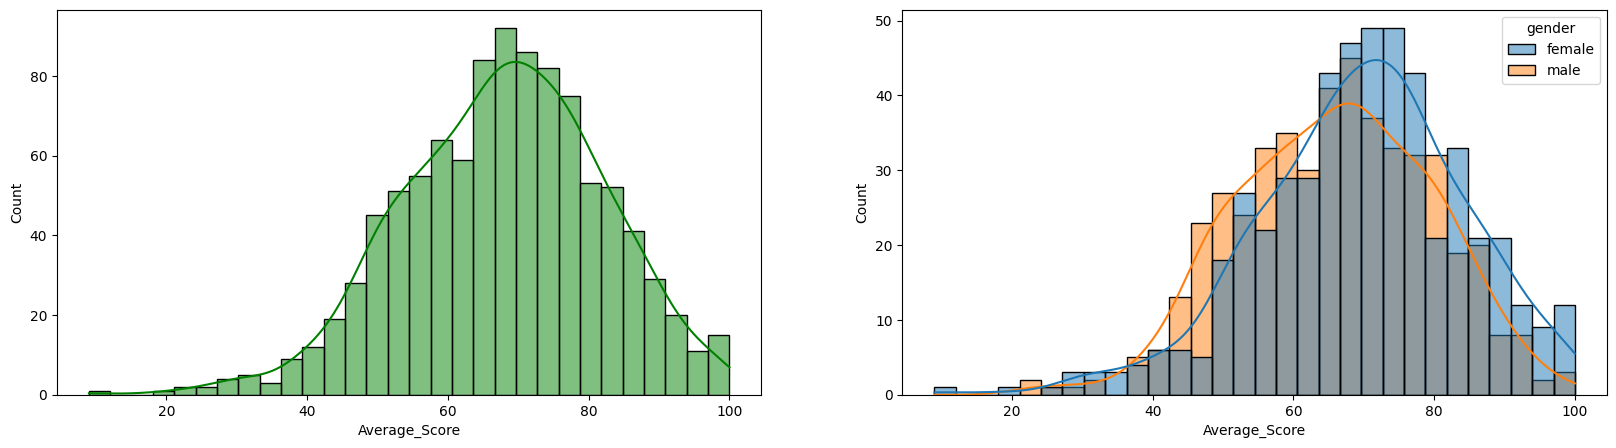

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average_Score',bins=30,hue='gender',kde=True)